# Consumer Price Index 

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

color_pal = sns.color_palette() 
plt.style.use('fivethirtyeight')

## Attribute Information:

- Date: Observation Date

- CPI_All: Consumer Price Index for All Urban Consumers: All Items in U.S. City Average, Percent Change from Year Ago, Monthly, Seasonally Adjusted

- CPI_Minus: Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average, Percent Change from Year Ago, Monthly, Seasonally Adjusted

In [2]:
# load the data
cpi = pd.read_excel('cpi_data.xlsx')

# create a copy of the data frame to work with 
df = cpi.copy()

# check the shape of the data
print("The dataframe shape is:",cpi.shape)

The dataframe shape is: (907, 3)


# Exploratory Data Analysis

In [3]:
# first 10 observations of data
df.head(10)

,date,CPI_All,CPI_Minus
0,1948-01-01,10.24209,NaN
1,1948-02-01,9.48196,NaN
2,1948-03-01,6.81818,NaN
3,1948-04-01,8.27273,NaN
4,1948-05-01,9.38497,NaN
5,1948-06-01,9.37500,NaN
6,1948-07-01,9.76158,NaN
7,1948-08-01,9.06250,NaN
8,1948-09-01,6.65499,NaN
9,1948-10-01,6.11087,NaN


In [4]:
# check the data info and column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       907 non-null    datetime64[ns]
 1   CPI_All    907 non-null    float64       
 2   CPI_Minus  787 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 21.4 KB


Observe how are data column is already in datetime format. Now we set it in our index

In [5]:
df.columns

Index(['date', 'CPI_All', 'CPI_Minus'], dtype='object')

In [6]:
df = df.set_index('date')
df.head()

,CPI_All,CPI_Minus
date,,
1948-01-01,10.24209,NaN
1948-02-01,9.48196,NaN
1948-03-01,6.81818,NaN
1948-04-01,8.27273,NaN
1948-05-01,9.38497,NaN


Setting the index as our dates makes our plotting easier as you will see.

In [7]:
# check how many null values we have
df.isna().sum()

CPI_All        0
CPI_Minus    120
dtype: int64

In [8]:
# statistical information 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CPI_All,907.0,3.539343,2.913328,-2.98813,1.635845,2.84698,4.541825,14.59227
CPI_Minus,787.0,3.677287,2.510036,0.60272,1.996040,2.70092,4.705745,13.60449


In [9]:
# now we check the date ranges
print("The date for our data starts from:", df.index.min())
print("The date for our data ends in:",df.index.max())

The date for our data starts from: 1948-01-01 00:00:00
The date for our data ends in: 2023-07-01 00:00:00


# Visualizations

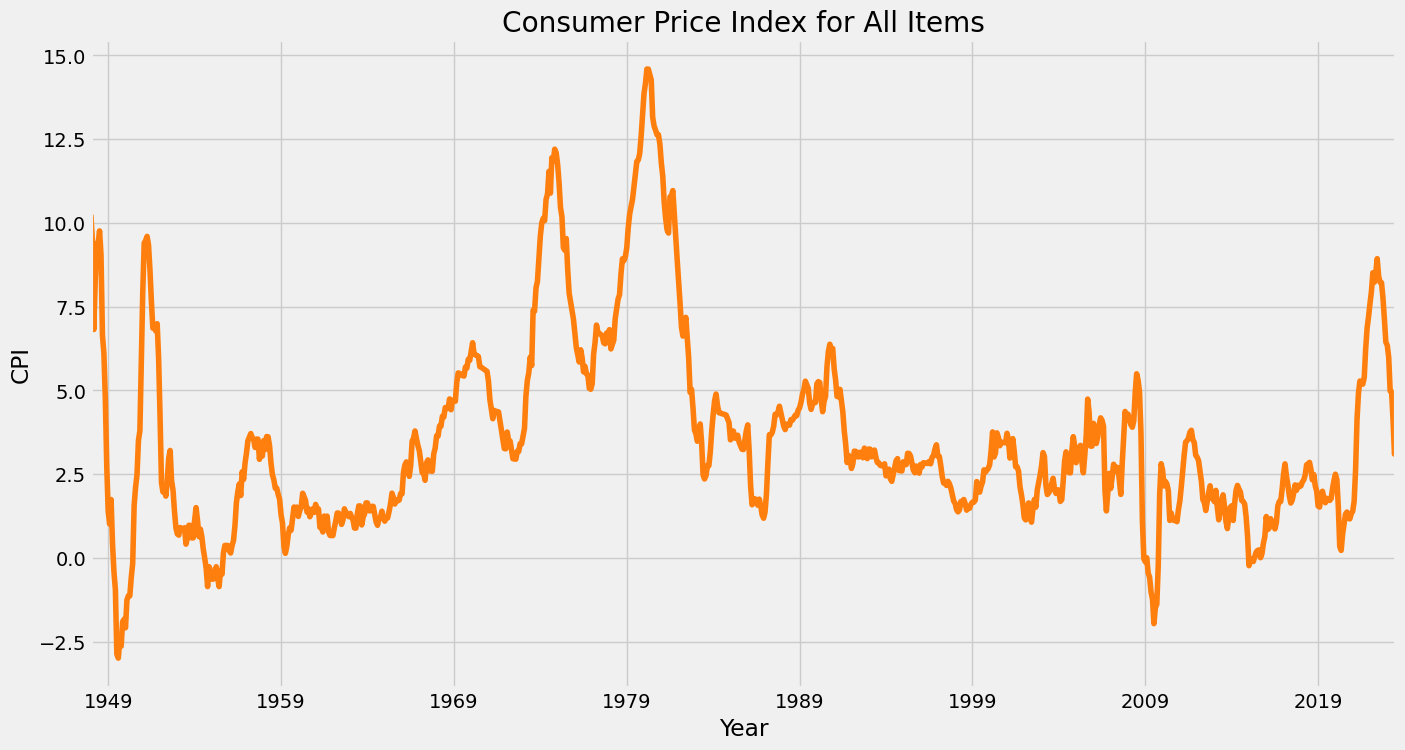

In [10]:
df['CPI_All'].plot(figsize=(15,8), title = "Consumer Price Index for All Items", color = color_pal[1])
plt.xlabel('Year')
plt.ylabel('CPI')
plt.show()

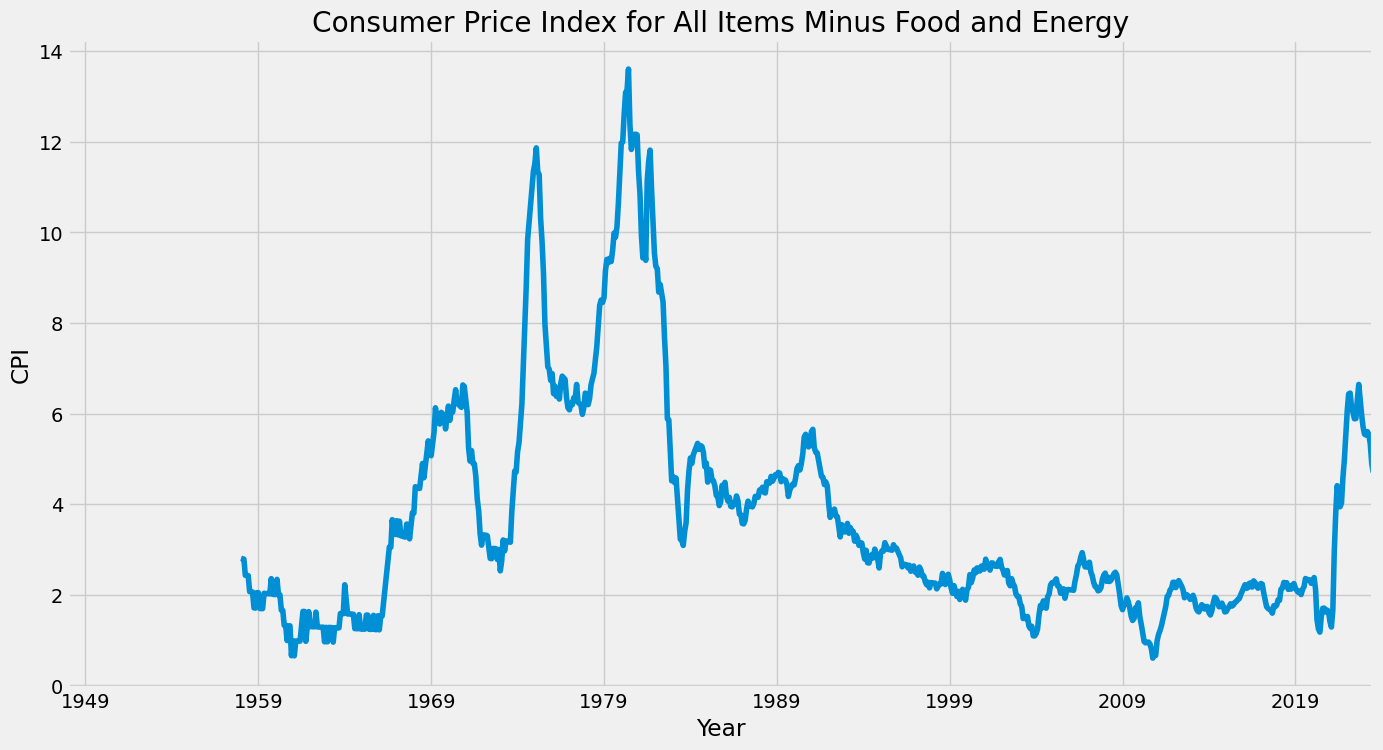

In [11]:
df['CPI_Minus'].plot(figsize=(15,8), title = "Consumer Price Index for All Items Minus Food and Energy")
plt.xlabel('Year')
plt.ylabel('CPI')
plt.show()

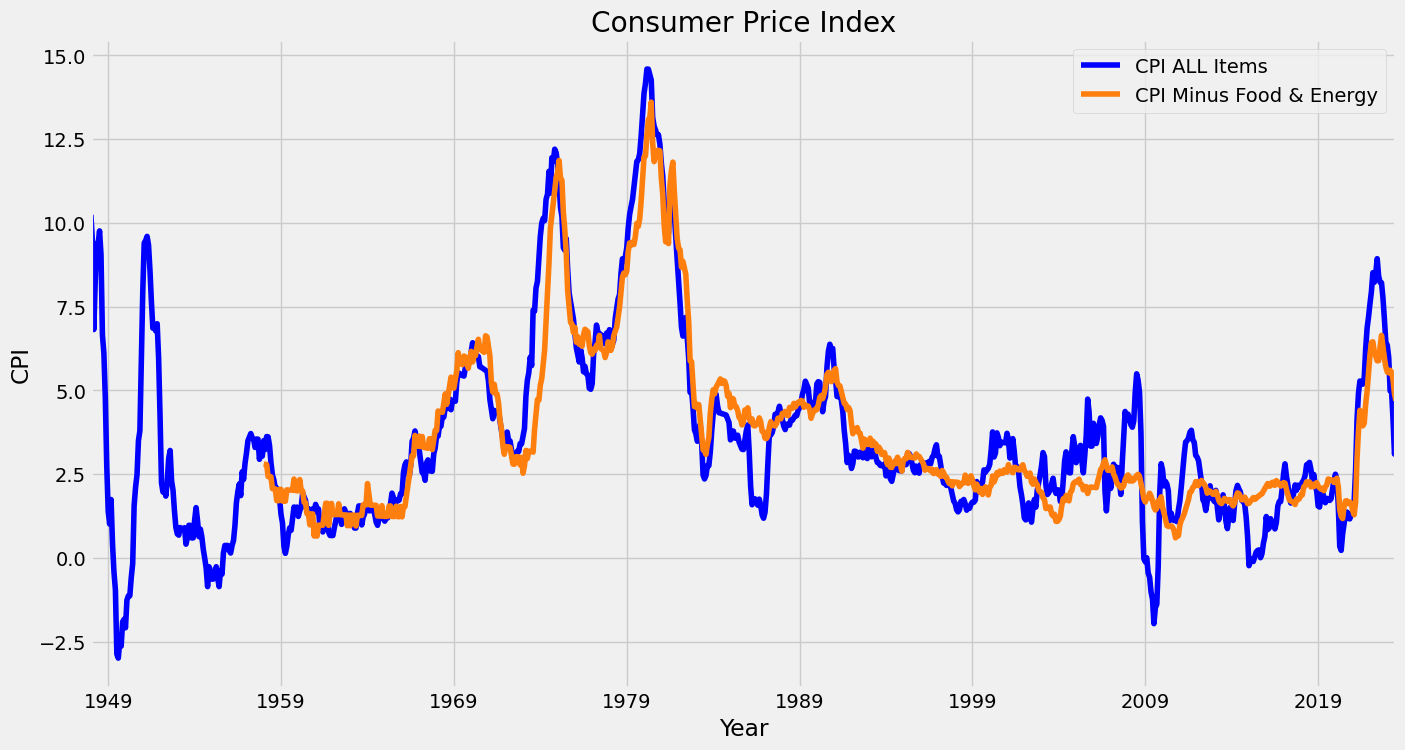

In [12]:
# Plot the Gasoline Real Price alongside its nominal price
fig, ax = plt.subplots(figsize = (15,8))
fig = df['CPI_All'].plot(color = 'b', title = "Consumer Price Index")
df['CPI_Minus'].plot(figsize = (15,8), color = color_pal[1], ax = ax)
plt.ylabel("CPI")
plt.xlabel("Year")
plt.legend(['CPI ALL Items', 'CPI Minus Food & Energy'])
plt.show()

<Figure size 1500x800 with 0 Axes>

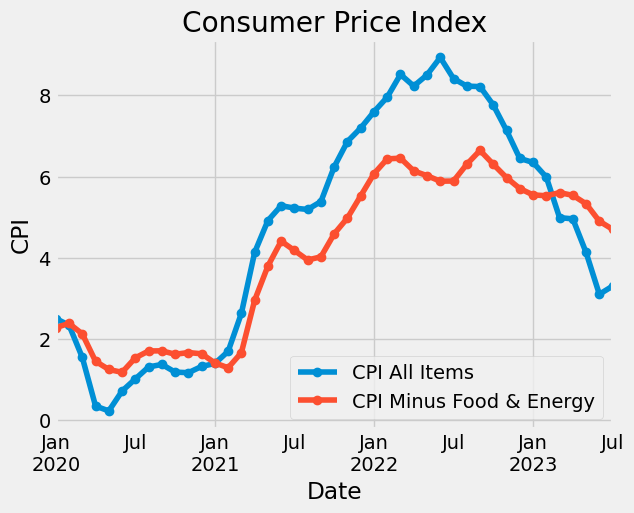

In [13]:
plt.figure(figsize=(15,8))
df.loc[df.index.year>=2020].plot(marker='o')
plt.title('Consumer Price Index')
plt.ylabel("CPI")
plt.xlabel("Date")
plt.legend(["CPI All Items","CPI Minus Food & Energy"])
plt.show()

Recall Covid Shut downs began in the states in March 2020 and shortly after you can see how fast consumer price index quickly rose. We can also see that it reached its peak in September, 2022. 

In [14]:
# Splitting the data

# our train data will be everything before 2023
train = df.loc[df.index < "2023-04-01"]

# our test data will be on and after 2023
test = df.loc[df.index >= "2023-04-01"]

In [15]:
# shape of our train and test data
print("The training data shape is:", train.shape)
print("The testing data shape is", test.shape)

The training data shape is: (903, 2)
The testing data shape is (4, 2)


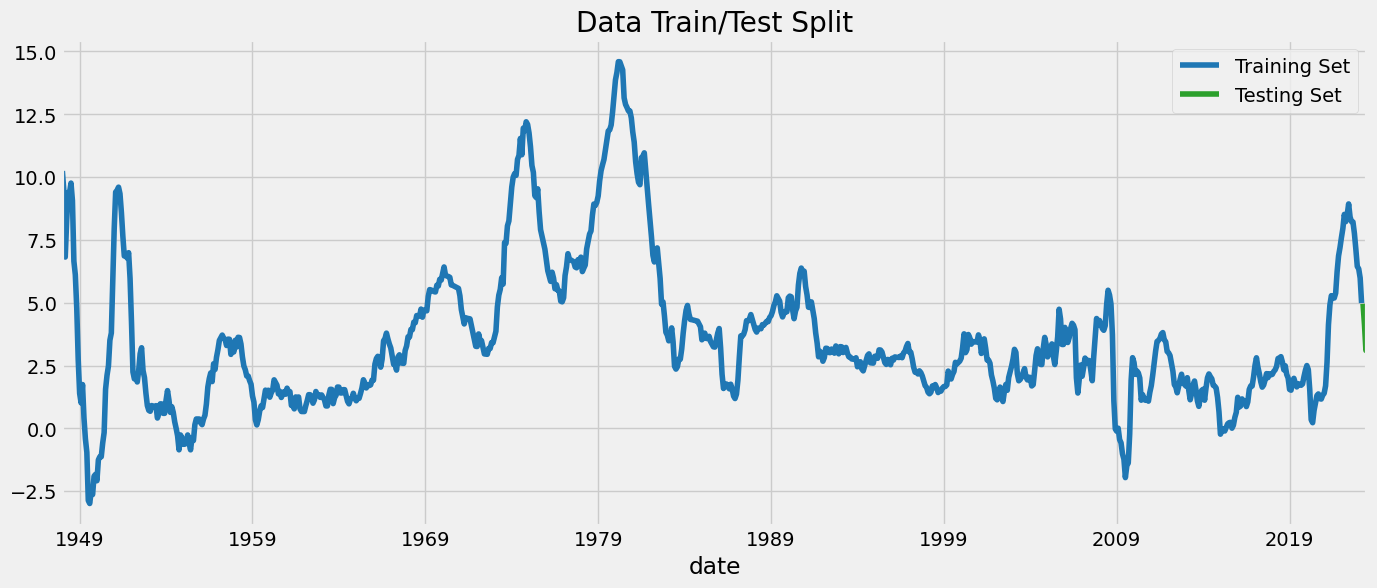

In [16]:
# plot the training and testing data
fig, ax = plt.subplots(figsize = (15,6))
fig = train['CPI_All'].plot(ax = ax, 
                        label = 'Training Set',  
                        title = 'Data Train/Test Split', 
                        color = color_pal[0])

test['CPI_All'].plot(ax = ax, 
                        label = 'Testing Set', 
                        color = color_pal[2])

ax.legend(['Training Set', 'Testing Set'])
plt.show()

# Time Series Cross Validation

In [17]:
from sklearn.model_selection import TimeSeriesSplit

In [18]:
tss = TimeSeriesSplit(n_splits = 5, test_size = 12, gap = 0)
df = df.sort_index()

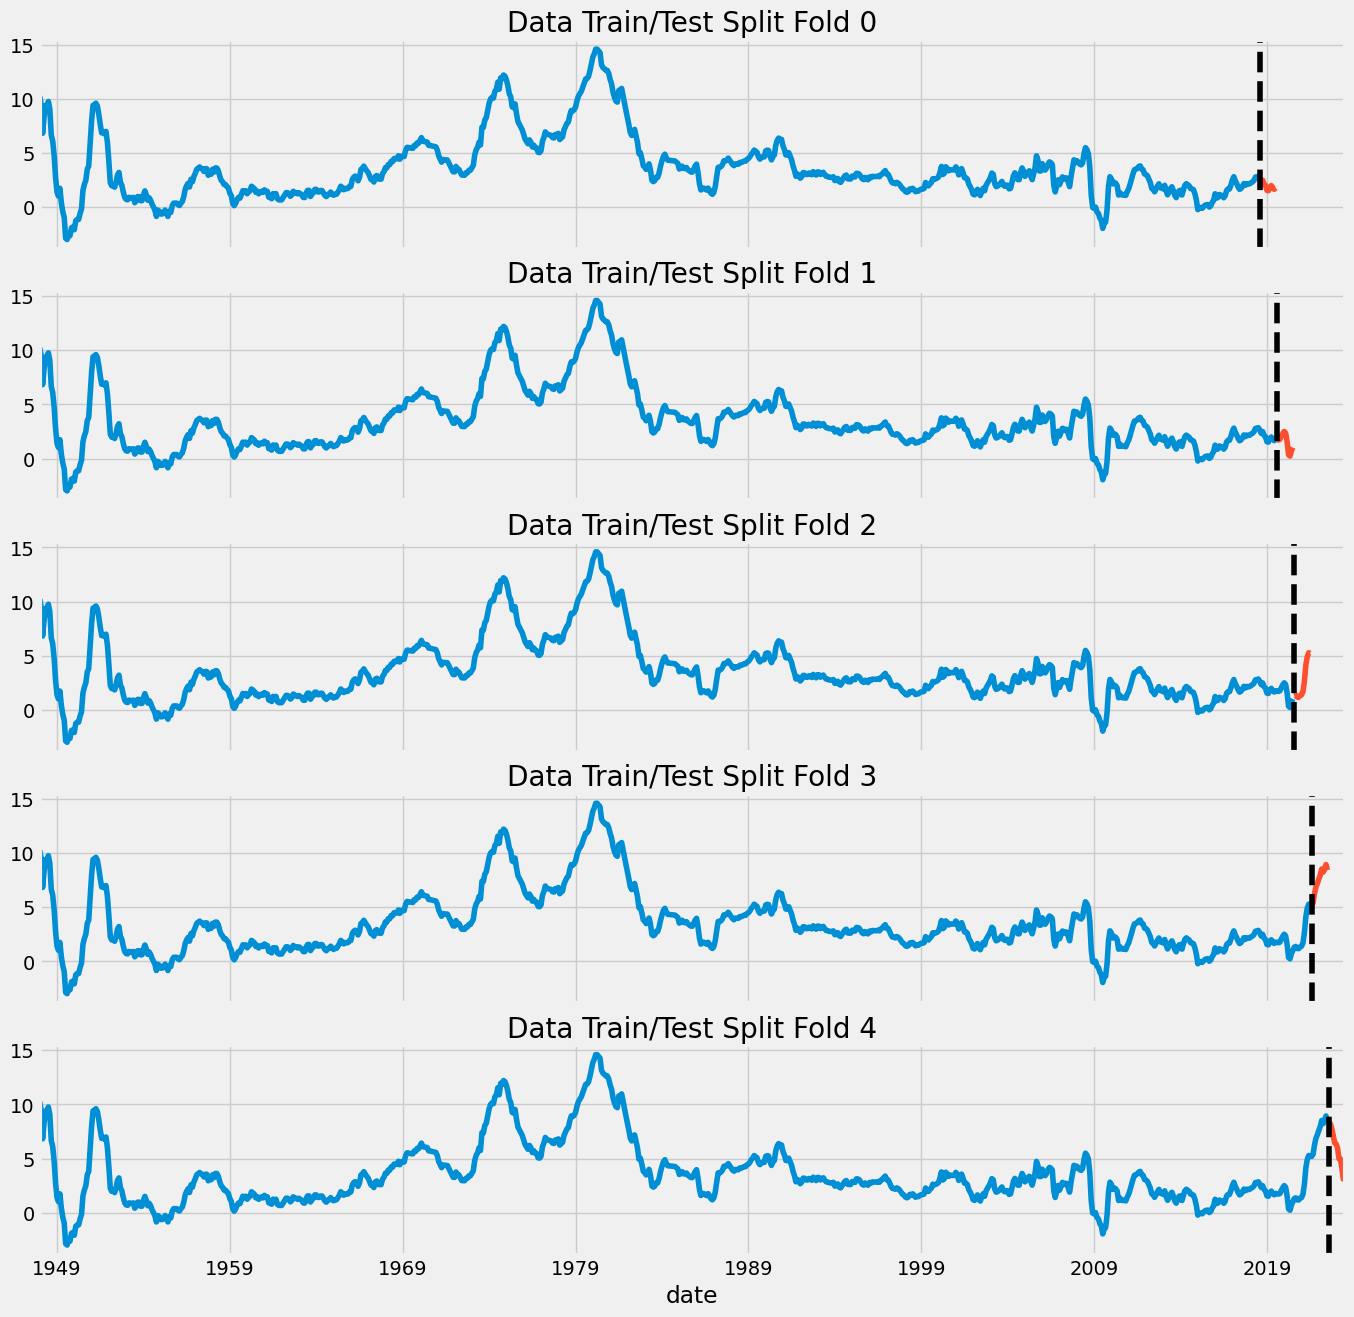

In [19]:
# get indices
fig, axs = plt.subplots(5, 1, figsize = (15,15), sharex = True)
fold = 0 
for train_idx, val_idx in tss.split(df):
    
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['CPI_All'].plot(ax = axs[fold], 
                            label = 'Training Set',
                            title = f'Data Train/Test Split Fold {fold}')
    test['CPI_All'].plot(ax = axs[fold], 
                            label = 'Testing Set')
    axs[fold].axvline(test.index.min(), color = 'black', ls = '--')
                            
    fold += 1

# Feature Engineering

In [20]:
# feature engineering function for time series index

def create_features(df):
    """ 
    create time series features based on time series index
    """ 
    df = df.copy()
    # start from monday as 0 and sunday as a 6
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] =  df.index.dayofyear
    return df

#df = create_features(df)

In [21]:
# last 10 observations
df.tail(10)

,CPI_All,CPI_Minus
date,,
2022-10-01,7.76249,6.30176
2022-11-01,7.13535,5.97198
2022-12-01,6.44494,5.70386
2023-01-01,6.34716,5.54757
2023-02-01,5.98644,5.52600
2023-03-01,4.98692,5.60257
2023-04-01,4.95719,5.53666
2023-05-01,4.12884,5.32864
2023-06-01,3.10000,4.90000


In [26]:
# add lagging indicators for future predictions

def add_lags(df):
      
   #target_map = df['Gas Price'].to_dict()
   df = df.copy()
   df['lag1'] = df['CPI_All'].shift(1)
   df['lag2'] = df['CPI_All'].shift(2)
   df['lag3'] = df['CPI_All'].shift(3)
   df['lag4'] = df['CPI_All'].shift(4)
   df['lag5'] = df['CPI_All'].shift(5)
   df['lag6'] = df['CPI_All'].shift(6)
#   df['lag7'] = df['CPI_All'].shift(8)
   df['lag8'] = df['CPI_All'].shift(10)
#   df['lag9'] = df['CPI_All'].shift(11)
   df['lag10'] = df['CPI_All'].shift(13)
#   df['lag11'] = df['CPI_All'].shift(15)
   df['lag12'] = df['CPI_All'].shift(16)
   
   return df

# add lags to our data frame
df = add_lags(df)

In [27]:
df.tail()

,CPI_All,CPI_Minus,lag1,lag2,lag3,lag4,lag5,lag6,lag8,lag10,lag12
date,,,,,,,,,,,
2023-03-01,4.98692,5.60257,5.98644,6.34716,6.44494,7.13535,7.76249,8.21485,8.50233,7.95485,6.86239
2023-04-01,4.95719,5.53666,4.98692,5.98644,6.34716,6.44494,7.13535,7.76249,8.93299,8.51522,7.19446
2023-05-01,4.12884,5.32864,4.95719,4.98692,5.98644,6.34716,6.44494,7.13535,8.41318,8.22777,7.59528
2023-06-01,3.10000,4.90000,4.12884,4.95719,4.98692,5.98644,6.34716,6.44494,8.22736,8.50233,7.95485
2023-07-01,3.30000,4.70000,3.10000,4.12884,4.95719,4.98692,5.98644,6.34716,8.21485,8.93299,8.51522


# Modeling

## XGBoost Regressor

In [28]:
# import XGBoost
import xgboost as xgb

In [29]:
# add lagging indicators for train and testing sets
train = add_lags(train)
test = add_lags(test)

In [30]:
# check the test index
test.index

DatetimeIndex(['2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [31]:
df.columns

Index(['CPI_All', 'CPI_Minus', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6',
       'lag8', 'lag10', 'lag12'],
      dtype='object')

In [32]:
# now we choose our features and target

Features = ["lag1","lag2","lag3","lag4","lag5","lag6","lag8","lag10","lag12"]

Target = "CPI_All"

In [33]:
# train test split
X_train = train[Features]
y_train = train[Target]

X_test = test[Features]
y_test = test[Target]

In [35]:
##### n estimators number of trees
# instantiate our model 
boost = xgb.XGBRegressor(n_estimators = 5000, 
                          early_stopping_rounds = 50, 
                          learning_rate = 0.0015,
                        max_depth = 3, random_state = 0)
boost.fit(X_train, y_train, 
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose = 100)

[0]	validation_0-rmse:4.18028	validation_1-rmse:5.64332
[100]	validation_0-rmse:3.62312	validation_1-rmse:4.80955
[200]	validation_0-rmse:3.14237	validation_1-rmse:4.07159
[300]	validation_0-rmse:2.72794	validation_1-rmse:3.42304
[400]	validation_0-rmse:2.37116	validation_1-rmse:2.86778
[500]	validation_0-rmse:2.06425	validation_1-rmse:2.39196
[600]	validation_0-rmse:1.80015	validation_1-rmse:1.98230
[700]	validation_0-rmse:1.57338	validation_1-rmse:1.63470
[800]	validation_0-rmse:1.37888	validation_1-rmse:1.34058
[900]	validation_0-rmse:1.21289	validation_1-rmse:1.09514
[1000]	validation_0-rmse:1.07164	validation_1-rmse:0.89236
[1100]	validation_0-rmse:0.95182	validation_1-rmse:0.73128
[1200]	validation_0-rmse:0.85072	validation_1-rmse:0.61292
[1300]	validation_0-rmse:0.76573	validation_1-rmse:0.53153
[1400]	validation_0-rmse:0.69442	validation_1-rmse:0.48325
[1500]	validation_0-rmse:0.63437	validation_1-rmse:0.46024
[1600]	validation_0-rmse:0.58426	validation_1-rmse:0.44430
[1655]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

### Feature Importance

In [36]:
# training set columns
X_train.columns

Index(['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag8', 'lag10',
       'lag12'],
      dtype='object')

In [37]:
# printing the column importance in our model
boost.feature_importances_

array([0.8429064 , 0.02165882, 0.04218957, 0.0028089 , 0.01281415,
       0.00826557, 0.01357704, 0.02916861, 0.02661098], dtype=float32)

In [38]:
# placing our column importance in a dataframe
fi = pd.DataFrame(data = boost.feature_importances_, index = boost.feature_names_in_,
            columns = ['importance'])

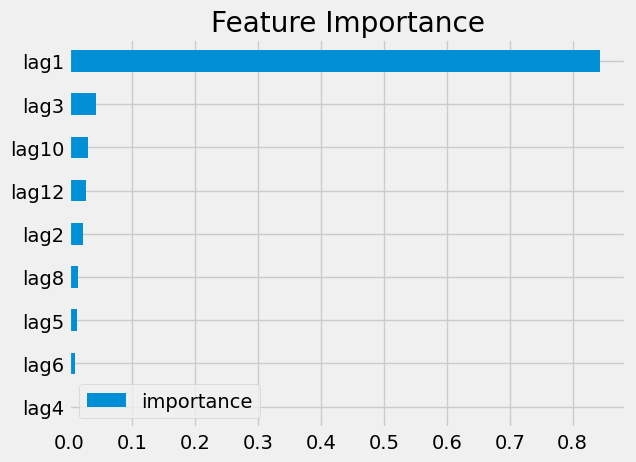

In [39]:
# plot which features were importance in the model as a bundle
fi.sort_values('importance').plot( kind = 'barh', title = 'Feature Importance')
plt.show()

### Predictions on Testing Set

In [40]:
# get test predictions
test['prediction'] = boost.predict(X_test)

In [41]:
# combining the original data frame with test predictions
df = df.merge(test[['prediction']], how = 'left', left_index = True, right_index = True)

In [42]:
# check predictions
df.tail()

,CPI_All,CPI_Minus,lag1,lag2,lag3,lag4,lag5,lag6,lag8,lag10,lag12,prediction
date,,,,,,,,,,,,
2023-03-01,4.98692,5.60257,5.98644,6.34716,6.44494,7.13535,7.76249,8.21485,8.50233,7.95485,6.86239,5.314011
2023-04-01,4.95719,5.53666,4.98692,5.98644,6.34716,6.44494,7.13535,7.76249,8.93299,8.51522,7.19446,4.369226
2023-05-01,4.12884,5.32864,4.95719,4.98692,5.98644,6.34716,6.44494,7.13535,8.41318,8.22777,7.59528,4.401660
2023-06-01,3.10000,4.90000,4.12884,4.95719,4.98692,5.98644,6.34716,6.44494,8.22736,8.50233,7.95485,3.564693
2023-07-01,3.30000,4.70000,3.10000,4.12884,4.95719,4.98692,5.98644,6.34716,8.21485,8.93299,8.51522,2.922621


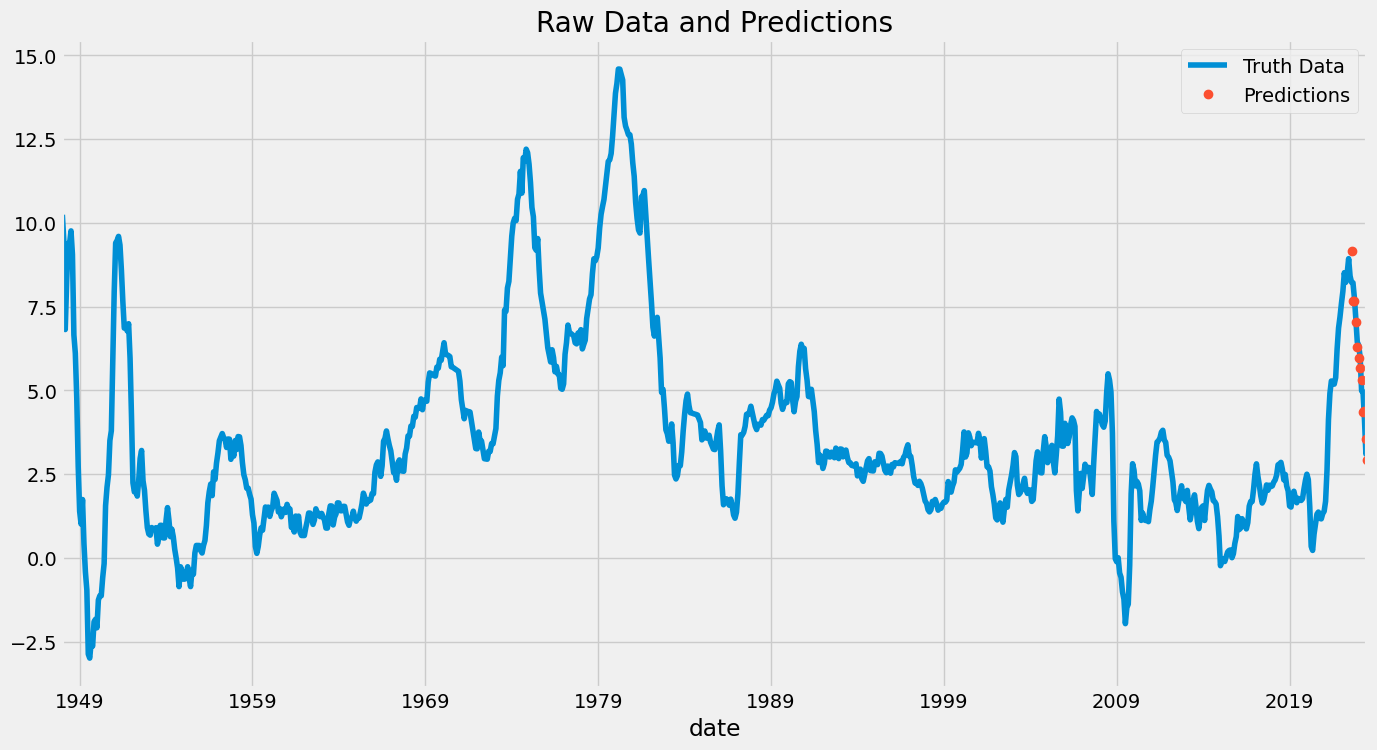

In [43]:
ax = df[['CPI_All']].plot(figsize = (15,8))
df['prediction'].plot(ax = ax, style = 'o')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Predictions')
plt.show()

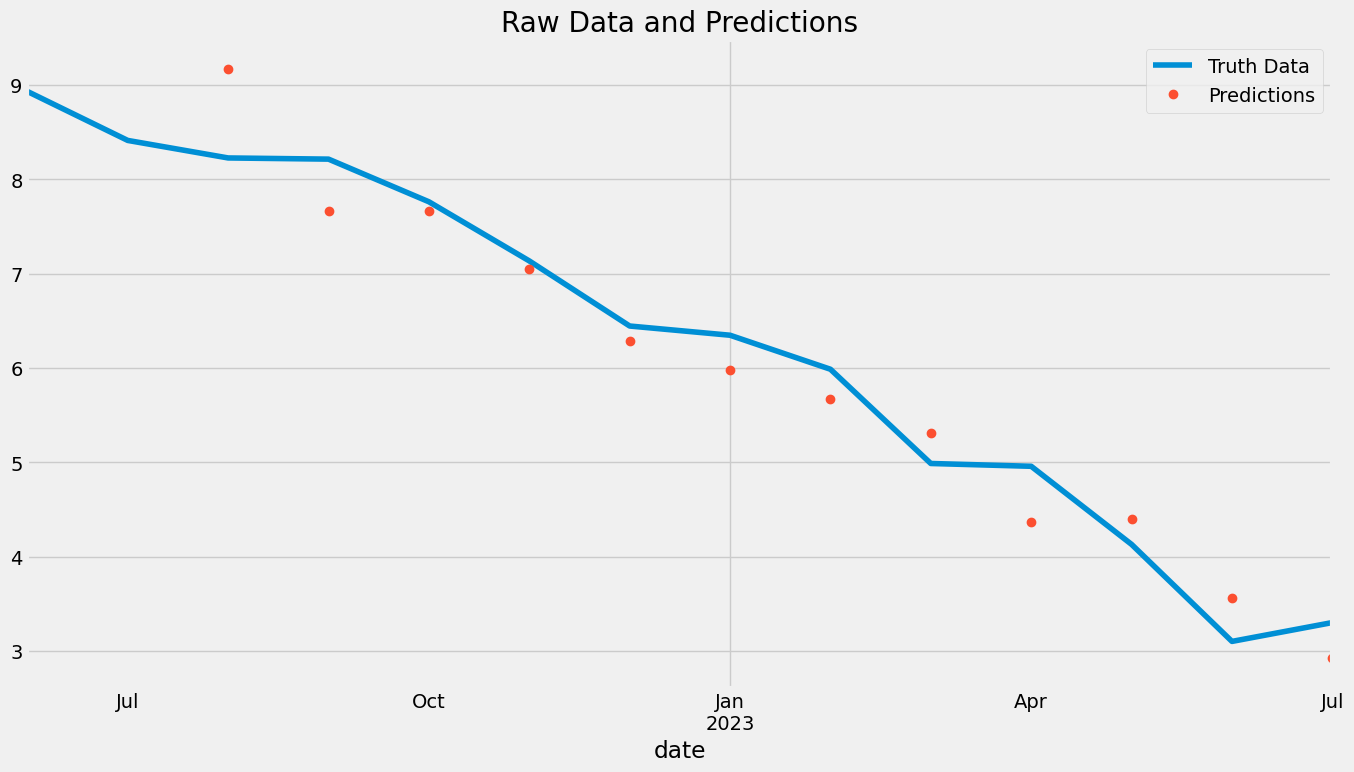

In [44]:
# plot the last 6 years of data along side the predictions
ax = df.loc[df.index >= '2022-06-01']['CPI_All'] \
.plot(figsize = (15,8), title = 'Test Set')
df.loc[df.index >= '2022-06-01']['prediction'] \
.plot(style = 'o')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Predictions')
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
# Root mean squared error for our predictions and actual prices
rmse = mean_squared_error(test['CPI_All'], test['prediction'], squared = False)
print(f'RMSE score on Test set is: {rmse:0.4f}')

RMSE score on Test set is: 0.4432


### Training using Cross-Validation

In [47]:
df.columns

Index(['CPI_All', 'CPI_Minus', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6',
       'lag8', 'lag10', 'lag12', 'prediction'],
      dtype='object')

In [64]:
# 5-fold Cross Validation for Time Series
tss = TimeSeriesSplit(n_splits = 5, test_size = 12, gap = 0)
df = df.sort_index()


fold = 0
preds = []
scores = []

for train_idx, val_idx in tss.split(df):
        

        train = df.iloc[train_idx]
        test = df.iloc[val_idx]

        #train = create_features(train)
        #test = create_features(test)
        # add lagging indicators for train and testing sets
        train = add_lags(train)
        test = add_lags(test)

        # our target variable
        Features = ["lag1","lag2","lag3","lag4","lag5","lag6"]

        # our response variable|
        Target = "CPI_All"

        X_train = train[Features]
        y_train = train[Target]

        X_test = test[Features]
        y_test = test[Target]

        reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                                n_estimators=5000,
                                early_stopping_rounds=50,
                                objective='reg:squarederror',
                                max_depth=3,
                                learning_rate=0.0015,
                                random_sate =0)
        reg.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                verbose=100)

        y_pred = reg.predict(X_test)
        preds.append(y_pred)
        score = mean_squared_error(y_test, y_pred, squared = False)
        scores.append(score)

[12:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "random_sate" } are not used.

[0]	validation_0-rmse:4.19642	validation_1-rmse:1.51640


[100]	validation_0-rmse:3.63758	validation_1-rmse:1.21740
[200]	validation_0-rmse:3.15556	validation_1-rmse:1.02457
[300]	validation_0-rmse:2.73967	validation_1-rmse:0.94517
[373]	validation_0-rmse:2.47307	validation_1-rmse:0.95196
[12:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "random_sate" } are not used.

[0]	validation_0-rmse:4.17086	validation_1-rmse:1.26394
[100]	validation_0-rmse:3.61548	validation_1-rmse:1.04288
[200]	validation_0-rmse:3.13657	validation_1-rmse:0.97264
[250]	validation_0-rmse:2.92220	validation_1-rmse:0.98377
[12:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "random_sate" } are not used.

[0]	validation_0-rmse:4.14469	validation_1-rmse:2.69821
[100]	validation_0-rmse:3.59302	validation_1-rmse:2.39016
[200]	validation_0-rms

In [65]:
# Cross Validation results
print(f'RMSE mean score across 5-folds: {np.mean(scores):0.4f}')
print(f'5-Fold scores: {scores}')

RMSE mean score across 5-folds: 1.1547
5-Fold scores: [0.9419024207740175, 0.9724770348906188, 1.9515441866586132, 1.456816895902807, 0.45068806502370334]


### Forecasting using our Model

In [66]:
df.columns

Index(['CPI_All', 'CPI_Minus', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6',
       'lag8', 'lag10', 'lag12', 'prediction', 'isFuture'],
      dtype='object')

In [97]:
# Retrain on all data 
df = add_lags(df)

# our target variable
Features = ["lag1","lag2","lag3","lag4","lag5","lag6"]

# our response variable|
Target = "CPI_All"

X_all = df[Features]
y_all = df[Target]

reg = xgb.XGBRegressor(n_estimators = 5000, 
                        base_score = 0.5,
                        booster = 'gbtree',
                        objective = 'reg:squarederror',
                        early_stopping_rounds=50,
                        max_depth = 3,
                        learning_rate = 0.0015)

reg.fit(X_all, y_all, 
        eval_set = [(X_all,y_all)],
        verbose = 100)

[0]	validation_0-rmse:4.20297
[100]	validation_0-rmse:3.64241
[200]	validation_0-rmse:3.15897
[300]	validation_0-rmse:2.74204
[400]	validation_0-rmse:2.38317
[500]	validation_0-rmse:2.07452
[600]	validation_0-rmse:1.80879
[700]	validation_0-rmse:1.58061
[800]	validation_0-rmse:1.38514
[900]	validation_0-rmse:1.21834
[1000]	validation_0-rmse:1.07646
[1100]	validation_0-rmse:0.95622
[1200]	validation_0-rmse:0.85478
[1300]	validation_0-rmse:0.76961
[1400]	validation_0-rmse:0.69806
[1500]	validation_0-rmse:0.63843
[1600]	validation_0-rmse:0.58897
[1700]	validation_0-rmse:0.54825
[1800]	validation_0-rmse:0.51480
[1900]	validation_0-rmse:0.48734
[2000]	validation_0-rmse:0.46452
[2100]	validation_0-rmse:0.44581
[2200]	validation_0-rmse:0.43036
[2300]	validation_0-rmse:0.41777
[2400]	validation_0-rmse:0.40730
[2500]	validation_0-rmse:0.39862
[2600]	validation_0-rmse:0.39136
[2700]	validation_0-rmse:0.38493
[2800]	validation_0-rmse:0.37954
[2900]	validation_0-rmse:0.37479
[3000]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Create a data frame with future dates

In [98]:
# maximum date in our original data
df.index.max()

Timestamp('2023-07-01 00:00:00')

In [99]:
# check the values of our last date
df.tail(1)

,CPI_All,CPI_Minus,lag1,lag2,lag3,lag4,lag5,lag6,lag8,lag10,lag12,prediction,isFuture
date,,,,,,,,,,,,,
2023-07-01,3.3,4.7,3.1,4.12884,4.95719,4.98692,5.98644,6.34716,8.21485,8.93299,8.51522,2.922621,False


In [100]:
# create a future data frame
# where the dates are seperated by the start of the month 

future = pd.date_range('2023-08-01', '2023-11-01', freq = 'MS')
future

DatetimeIndex(['2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01'], dtype='datetime64[ns]', freq='MS')

In [111]:
# make a future dates into a data frame
future_df = pd.DataFrame(index = future)

# if the dates are in the future set to True
future_df['isFuture'] = True

# if the dates are not in the future set to false
df['isFuture'] = False

# combine the orginal data frame with future dates
df_and_future = pd.concat([df,future_df])

In [112]:
# check combined dataframe
df_and_future.tail(14)

,CPI_All,CPI_Minus,lag1,lag2,lag3,lag4,lag5,lag6,lag8,lag10,lag12,prediction,isFuture
2022-10-01,7.76249,6.30176,8.21485,8.22736,8.41318,8.93299,8.50233,8.22777,7.19446,5.38363,5.28161,7.662653,False
2022-11-01,7.13535,5.97198,7.76249,8.21485,8.22736,8.41318,8.93299,8.50233,7.59528,6.23775,5.22151,7.051765,False
2022-12-01,6.44494,5.70386,7.13535,7.76249,8.21485,8.22736,8.41318,8.93299,7.95485,6.86239,5.18829,6.289603,False
2023-01-01,6.34716,5.54757,6.44494,7.13535,7.76249,8.21485,8.22736,8.41318,8.51522,7.19446,5.38363,5.978328,False
2023-02-01,5.98644,5.52600,6.34716,6.44494,7.13535,7.76249,8.21485,8.22736,8.22777,7.59528,6.23775,5.668987,False
2023-03-01,4.98692,5.60257,5.98644,6.34716,6.44494,7.13535,7.76249,8.21485,8.50233,7.95485,6.86239,5.314011,False
2023-04-01,4.95719,5.53666,4.98692,5.98644,6.34716,6.44494,7.13535,7.76249,8.93299,8.51522,7.19446,4.369226,False
2023-05-01,4.12884,5.32864,4.95719,4.98692,5.98644,6.34716,6.44494,7.13535,8.41318,8.22777,7.59528,4.401660,False
2023-06-01,3.10000,4.90000,4.12884,4.95719,4.98692,5.98644,6.34716,6.44494,8.22736,8.50233,7.95485,3.564693,False
2023-07-01,3.30000,4.70000,3.10000,4.12884,4.95719,4.98692,5.98644,6.34716,8.21485,8.93299,8.51522,2.922621,False


In [108]:
def add_lags(df):
    
  #target_map = df['Gas Price'].to_dict()
  df = df.copy()
  df['lag1'] = df['CPI_All'].shift(1)
  df['lag2'] = df['CPI_All'].shift(2)
  df['lag3'] = df['CPI_All'].shift(3)
  df['lag4'] = df['CPI_All'].shift(4)
  df['lag5'] = df['CPI_All'].shift(5)
  df['lag6'] = df['CPI_All'].shift(6)
#   df['lag7'] = df['CPI_All'].shift(8)
#   df['lag8'] = df['CPI_All'].shift(10)
#   df['lag9'] = df['CPI_All'].shift(11)
#   df['lag10'] = df['CPI_All'].shift(13)
#   df['lag11'] = df['CPI_All'].shift(15)
#   df['lag12'] = df['CPI_All'].shift(16)
  
  return df


In [113]:
# add the lags to the combined datasets
df_and_future = add_lags(df_and_future)

In [114]:
# return the data frame with future dates
future_w_features = df_and_future.query('isFuture').copy()

In [116]:
# print the remaining data frame
future_w_features

,CPI_All,CPI_Minus,lag1,lag2,lag3,lag4,lag5,lag6,lag8,lag10,lag12,prediction,isFuture
2023-08-01,NaN,NaN,3.3,3.1,4.12884,4.95719,4.98692,5.98644,NaN,NaN,NaN,NaN,True
2023-09-01,NaN,NaN,NaN,3.3,3.10000,4.12884,4.95719,4.98692,NaN,NaN,NaN,NaN,True
2023-10-01,NaN,NaN,NaN,NaN,3.30000,3.10000,4.12884,4.95719,NaN,NaN,NaN,NaN,True
2023-11-01,NaN,NaN,NaN,NaN,NaN,3.30000,3.10000,4.12884,NaN,NaN,NaN,NaN,True


In [117]:
# predict the gas price on the future dates
future_w_features['pred'] = reg.predict(future_w_features[Features])

In [118]:
# check the predictons
future_w_features

,CPI_All,CPI_Minus,lag1,lag2,lag3,lag4,lag5,lag6,lag8,lag10,lag12,prediction,isFuture,pred
2023-08-01,NaN,NaN,3.3,3.1,4.12884,4.95719,4.98692,5.98644,NaN,NaN,NaN,NaN,True,3.277020
2023-09-01,NaN,NaN,NaN,3.3,3.10000,4.12884,4.95719,4.98692,NaN,NaN,NaN,NaN,True,10.592663
2023-10-01,NaN,NaN,NaN,NaN,3.30000,3.10000,4.12884,4.95719,NaN,NaN,NaN,NaN,True,10.628485
2023-11-01,NaN,NaN,NaN,NaN,NaN,3.30000,3.10000,4.12884,NaN,NaN,NaN,NaN,True,10.301306


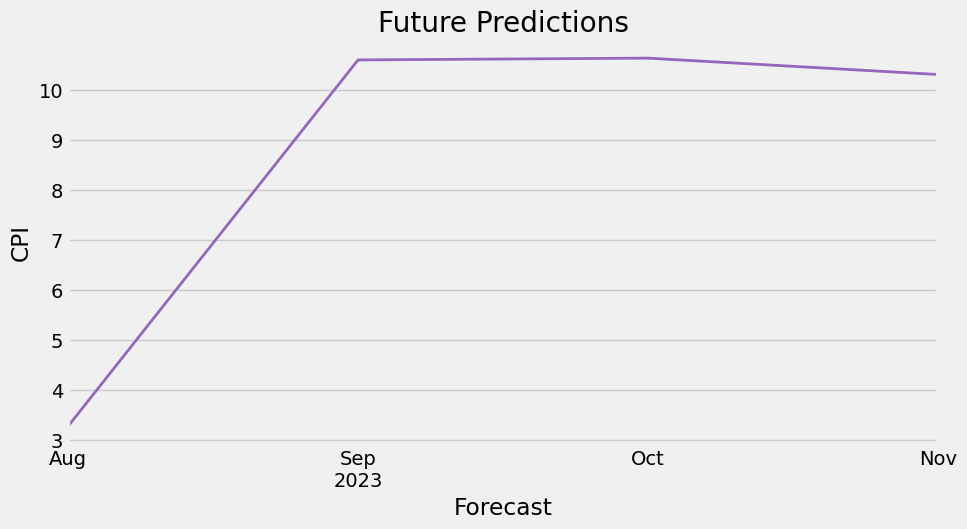

In [88]:
# plot the future dates and predicted prices
future_w_features['pred'].plot(figsize=(10, 5),
                                color=color_pal[4],
                                ms=1,
                                lw=2,
                                title='Future Predictions',
                              marker = 'x',)
plt.ylabel('CPI')
plt.xlabel('Forecast')
plt.show()